# Evaluation

In [3]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
hotel_rev = pd.read_csv('HotelRevHelpfulness.csv')
hotel_rev.head()

,hotelId,aveHelpfulnessRatioUser,stdevHelpfulnessRatioUser,pcReviewsExceedMinHelpfulnessSupport,numReviewsUser,numReviewsHotel,ratingUser,numberSubRatingsUser,subRatingMeanUser,subRatingStdevUser,...,completeness_2,completeness_3,numberTermsEntry,percentageAlphaCharsEntry,fractionUpperCaseCharsEntry,fractionYouVsIEntry,numberTermsSummaryQuote,percentageAlphaCharsSummaryQuote,fractionUpperCaseCharsSummaryQuote,reviewHelpfulness
0,17420,1.000000,0.000000,0.666667,3,16,5,4,4.000000,0.000000,...,0,1,182,0.788474,0.025703,0.500000,6,0.815789,0.096774,1
1,1397,0.772487,0.377321,0.500000,12,233,5,0,0.000000,0.000000,...,0,0,158,0.791888,0.012594,0.500000,1,1.000000,0.083333,1
2,1348,0.715473,0.300437,0.833333,12,302,4,7,3.714286,0.755929,...,0,3,59,0.799639,0.024831,0.333333,4,0.828571,0.034483,0
3,5940,0.521250,0.481675,0.222222,36,6,1,4,1.000000,0.000000,...,0,0,95,0.782212,0.029155,0.500000,2,0.800000,0.062500,0
4,38,0.603175,0.246926,1.000000,2,271,3,0,0.000000,0.000000,...,0,0,43,0.805128,0.028662,0.000000,1,1.000000,0.142857,0


'reviewHelpfulness' is the class label. `1` is positive and `0` is negative.

In [5]:
n = hotel_rev.shape[0]
np = hotel_rev['reviewHelpfulness'].sum()
nn = n - np
print('{} Samples'.format(n))
print('{} Positive \n{} Negative'.format(np,nn))

486 Samples
308 Positive 
178 Negative


In [6]:
y = hotel_rev.pop('reviewHelpfulness').values
X = hotel_rev.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/3)
print("X_test shape: ",X_test.shape)

mnb = GaussianNB()
hotel_rev_NB = mnb.fit(X_train, y_train)
y_dash = hotel_rev_NB.predict(X_test)

X_test shape:  (162, 24)


### Accuracy & Confusion Matrix
With the confusion matrix, rows are actual and columns are predicted.   
If 0 is negative and 1 is positive `C(0,0)` is TN and `C(1,1)` is TP.  
TN, FP  
FN, TP


In [8]:
acc = accuracy_score(y_test, y_dash)
print("Accuracy: {0:.2f}".format(acc)) 
confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Accuracy: 0.64
Confusion matrix:
[[41 21]
 [37 63]]


In [9]:
report = classification_report(y_test, y_dash, target_names = ['Not Helpful','Helpful'])
print("Report:\n{}".format(report)) 

Report:
              precision    recall  f1-score   support

 Not Helpful       0.53      0.66      0.59        62
     Helpful       0.75      0.63      0.68       100

    accuracy                           0.64       162
   macro avg       0.64      0.65      0.64       162
weighted avg       0.66      0.64      0.65       162



## SVM

In [10]:
 from sklearn.svm import SVC
svm = SVC(kernel = 'linear',C=1)
hotel_rev_SVM = svm.fit(X_train, y_train)
y_dash = hotel_rev_SVM.predict(X_test)

In [11]:
acc = accuracy_score(y_test, y_dash)
print("Accuracy: {0:.2f}".format(acc)) 
confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Accuracy: 0.69
Confusion matrix:
[[31 31]
 [20 80]]


In [12]:
report = classification_report(y_test, y_dash, target_names = ['Not Helpful','Helpful'])
print("Report:\n{}".format(report)) 

Report:
              precision    recall  f1-score   support

 Not Helpful       0.61      0.50      0.55        62
     Helpful       0.72      0.80      0.76       100

    accuracy                           0.69       162
   macro avg       0.66      0.65      0.65       162
weighted avg       0.68      0.69      0.68       162



### F1 Measure

In [13]:
from sklearn.metrics import f1_score
kNN = KNeighborsClassifier(n_neighbors=3)  
dtree = DecisionTreeClassifier(criterion='entropy')
mnb = GaussianNB()
models = [mnb,kNN,dtree]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0, 
                                                    test_size=1/3)
print('F1 Measure')
for m in models:
    mm = m.fit(X_train, y_train)
    y_pred = mm.predict(X_test)
    f1s = f1_score(y_test, y_pred) 
    print("F1 Score on Test set {:22} {:.2f}".format(type(m).__name__, f1s)) 

F1 Measure
F1 Score on Test set GaussianNB             0.68
F1 Score on Test set KNeighborsClassifier   0.68
F1 Score on Test set DecisionTreeClassifier 0.72


## Cross Validation
`cross_val_score` will run a k-fold cross validation.  
Using 4-fold cross validation because my machine has 4 threads (2 cores) and multiple cores are used on the SVM evaluation.  
5-fold X-Val effectively doubles processing time. 

In [15]:
from sklearn.model_selection import cross_val_score
mnb = GaussianNB()
scores = cross_val_score(mnb, X, y, cv=4)
print("4x CV Accuracy Naive Bayes: {0:.2f}".format(scores.mean())) 
scores

4x CV Accuracy Naive Bayes: 0.66


array([0.51639344, 0.67213115, 0.7107438 , 0.72727273])

In [16]:
kNN = KNeighborsClassifier(n_neighbors=3)  
kNN_scores = cross_val_score(kNN, X, y, cv=4)
print("4x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean())) 
kNN_scores


4x CV Accuracy kNNs: 0.63


array([0.59016393, 0.63934426, 0.61983471, 0.66942149])

In [17]:
dtree = DecisionTreeClassifier(criterion='entropy')
tree_scores = cross_val_score(dtree, X, y, cv=4)
print("4x CV Accuracy Trees: {0:.2f}".format(tree_scores.mean())) 
tree_scores

4x CV Accuracy Trees: 0.70


array([0.68852459, 0.68852459, 0.70247934, 0.71900826])

In [18]:
# n_jobs = -1 uses all available threads
from sklearn.svm import SVC
svm = SVC(kernel = 'linear',C=1)
svm_scores = cross_val_score(svm, X, y, cv=4, verbose = 5,  n_jobs = -1)
print("4x CV Accuracy SVMs: {0:.2f}".format(svm_scores.mean())) 
svm_scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:  1.7min remaining:  1.7min


4x CV Accuracy SVMs: 0.70


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.4min finished


array([0.6557377 , 0.68032787, 0.73553719, 0.7107438 ])

SVC comes with 70% accuracy.  
DTrees come in second with 70%.  
k-NN is last at 66%

### F1 Score
A balanced score that measures the harmonic mean between Precision and Recall.

In [19]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear',C=1)

In [20]:
models = [mnb,kNN,dtree,svm]
models = [mnb,kNN,dtree]    # leave out svm, life is too short...
folds = 4

In [21]:
print('F1 Measure')
for m in models:
    f1_scores = cross_val_score(m, X, y, cv=folds, scoring = 'f1', n_jobs=-1, verbose = 5)
    print("{} x CV {:22} {:.2f}".format(folds, type(m).__name__, f1_scores.mean())) 

F1 Measure
4 x CV GaussianNB             0.72
4 x CV KNeighborsClassifier   0.71
4 x CV DecisionTreeClassifier 0.76


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


## Precision & Recall

In [22]:
print('Precision')
for m in models:
    f1_scores = cross_val_score(m, X, y, cv=folds, scoring = 'precision', n_jobs=-1, verbose = 5)
    print("{} x CV {:22} {:.2f}".format(folds, type(m).__name__, f1_scores.mean())) 

Precision
4 x CV GaussianNB             0.74


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


4 x CV KNeighborsClassifier   0.71
4 x CV DecisionTreeClassifier 0.78


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


In [23]:
print('Recall')
for m in models:
    f1_scores = cross_val_score(m, X, y, cv=folds, scoring = 'recall', n_jobs=-1, verbose = 5)
    print("{} x CV {:22} {:.2f}".format(folds, type(m).__name__, f1_scores.mean())) 

Recall
4 x CV GaussianNB             0.71
4 x CV KNeighborsClassifier   0.71
4 x CV DecisionTreeClassifier 0.75


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


### ROC AUC analysis

In [24]:
folds = 4
print('ROC Analysis')
for m in models:
    roc_scores = cross_val_score(m, X, y, cv=folds, scoring = 'roc_auc', n_jobs=-1)
    print("{} x CV {:22} {:.2f}".format(folds, type(m).__name__, roc_scores.mean())) 

ROC Analysis
4 x CV GaussianNB             0.69
4 x CV KNeighborsClassifier   0.62
4 x CV DecisionTreeClassifier 0.68


## Calculating TP & FP with cross validation
The hold out validation shows that SVM has a very high FP rate. It has a strong bias towards the majority class (Helpful). 

Here we get a cross-validation estimate of this FP rate.  
To do this we have to make a scorer function to get the FP scores. 

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn)}

models = [mnb,kNN,dtree,svm]
models = [mnb,kNN,dtree]

folds = 4
v = 0 #  use 1 or 0

In [31]:
for m in models:
    cv_results = cross_validate(m, X, y, cv= folds,scoring=scoring, return_train_score=False, 
                                    verbose = v, n_jobs = -1)
    fp_rate = cv_results['test_fp'].sum()/(cv_results['test_fp'].sum()+cv_results['test_tn'].sum())
    tp_rate = cv_results['test_tp'].sum()/(cv_results['test_tp'].sum()+cv_results['test_fn'].sum())
  
    print("{} x CV {:22} FP: {:.2f}  TP: {:.2f}".format(folds, type(m).__name__, fp_rate, tp_rate)) 


4 x CV GaussianNB             FP: 0.44  TP: 0.71
4 x CV KNeighborsClassifier   FP: 0.51  TP: 0.71
4 x CV DecisionTreeClassifier FP: 0.37  TP: 0.73


The one score SVM does not win on is the FP rate. This is because it has a strong positive bias.

## Plot the confusion matrix

Confusion matrix, without normalization
[[31 31]
 [20 80]]
Normalized confusion matrix
[[0.5 0.5]
 [0.2 0.8]]


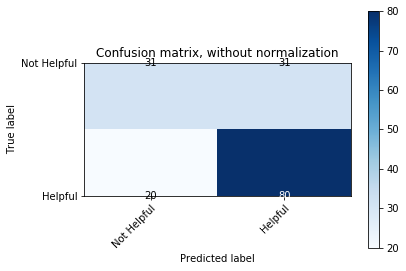

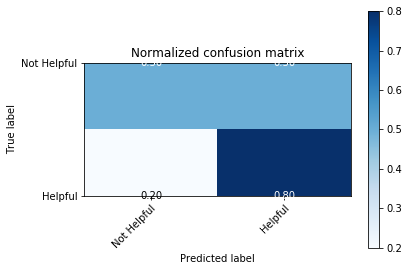

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_dash, classes=['Not Helpful','Helpful'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_dash, classes=['Not Helpful','Helpful'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()